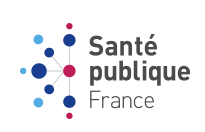

# NOTEBOOK DE NETTOYAGE

# Sommaire <a id="0"></a>



I.  [Importation des librairies et données](#1)<br>
II.  [Revue et Sélection des colonnes pertinentes](#2)<br>
III.  [Filtrage par ligne de produit](#3) <br>
V. [Traitement des valeurs nulles](#4)<br>
V. [Derniers retraitement et sauvegarde](#5) <br>



# Importation des librairies et des données <a id="1"></a>

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#import file
food_facts=pd.read_csv('Data/fr.openfoodfacts.org.products.csv', sep='\\t', engine='python')


In [4]:
food_facts.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
food_facts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(107), object(55)
memory usage: 396.5+ MB


# Revue et selection des colonnes <a id="2"></a>

Sélectionons les colonnes pertinentes en fonction : 
- de l'intérêt pour l'application
- le niveau d'information contenu dans la colonne

## Taux de remplissage de colonnes

In [6]:
#calcul du taux de remplissage par colonne
col_missing=food_facts.isna().sum(axis=0)/len(food_facts.index)*100

In [7]:
col_missing.describe()

count    162.000000
mean      76.221573
std       34.560616
min        0.000000
25%       56.437906
50%       97.967871
75%       99.990803
max      100.000000
dtype: float64

On voit qu'il y a des colonnes totalement vides, nous pouvons les supprimer.

In [8]:
#suppression des colonnes vides
food_facts.drop(labels=col_missing[col_missing ==100].index, axis=1, inplace=True)

In [9]:
food_facts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 142 entries, code to nutrition-score-uk_100g
dtypes: float64(87), object(55)
memory usage: 347.5+ MB


## Identification des colonnes par catégories

Il reste 142 colonnes sur les 162 initiales.
Identifions les colonnes par catégories afin de faciliter la suite de analyse

In [10]:
gen_cols=food_facts.iloc[:,:10].columns

In [11]:
print(len(gen_cols))
gen_cols

10


Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity'],
      dtype='object')

In [12]:
tag_cols=food_facts.iloc[:,10:34].columns

In [13]:
print(len(tag_cols))
tag_cols

24


Index(['packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_fr', 'origins', 'origins_tags',
       'manufacturing_places', 'manufacturing_places_tags', 'labels',
       'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags',
       'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places',
       'stores', 'countries', 'countries_tags', 'countries_fr'],
      dtype='object')

In [14]:
ingredients_cols=food_facts.iloc[:,34:39].columns

In [15]:
ingredients_cols

Index(['ingredients_text', 'allergens', 'traces', 'traces_tags', 'traces_fr'], dtype='object')

In [16]:
misc_cols=food_facts.iloc[:,39:58].columns

In [17]:
print(len(misc_cols))
misc_cols

19


Index(['serving_size', 'additives_n', 'additives', 'additives_tags',
       'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'image_url', 'image_small_url'],
      dtype='object')

In [18]:
nutri_cols=food_facts.iloc[:,58:].columns

In [19]:
print(len(nutri_cols))
nutri_cols

84


Index(['energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g',
       'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g',
       'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g',
       'arachidic-acid_100g', 'montanic-acid_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'omega-3-fat_100g',
       'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g',
       'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g',
       'arachidonic-acid_100g', 'gamma-linolenic-acid_100g',
       'omega-9-fat_100g', 'oleic-acid_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'sucrose_100g',
       'glucose_100g', 'fructose_100g', 'lactose_100g', 'maltose_100g',
       'maltodextrins_100g', 'starch_100g', 'polyols_100g', 'fiber_100g',
       'proteins_100g', 'casein_100g', 'serum-proteins_100g',
       'nucleotides_100g', 'salt_100g', 'sodium_100g', 'alcohol_100g',
       'vitamin-

##  Revue des colonnes de la catégorie General information

In [20]:
food_facts[gen_cols].tail(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity
320762,9908278636246,http://world-fr.openfoodfacts.org/produit/9908...,andre,1360585770,2013-02-11T12:29:30Z,1389960647,2014-01-17T12:10:47Z,Szprot w oleju roslinnym,Sprot,170g
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,balooval,1367163039,2013-04-28T15:30:39Z,1371690556,2013-06-20T01:09:16Z,Thé vert Earl grey,thé bio équitable,50 g
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,woshilapin,1430167954,2015-04-27T20:52:34Z,1430167992,2015-04-27T20:53:12Z,"Cheese cake thé vert, yuzu",NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,sebleouf,1446293229,2015-10-31T12:07:09Z,1446376839,2015-11-01T11:20:39Z,Rillette d'oie,NaN,180 g
320766,99410148,http://world-fr.openfoodfacts.org/produit/9941...,date-limite-app,1463936572,2016-05-22T17:02:52Z,1491244498,2017-04-03T18:34:58Z,NaN,NaN,NaN
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g
320771,999990026839,http://world-fr.openfoodfacts.org/produit/9999...,usda-ndb-import,1489072709,2017-03-09T15:18:29Z,1491244499,2017-04-03T18:34:59Z,"Sugar Free Drink Mix, Peach Tea",NaN,NaN


In [21]:
col_missing[gen_cols]

code                       0.000000
url                        0.000935
creator                    0.003117
created_t                  0.000000
created_datetime           0.000312
last_modified_t            0.000000
last_modified_datetime     0.000312
product_name               5.538513
generic_name              83.548128
quantity                  67.328819
dtype: float64

Les colonnes 'creator', 'created_t', 'created_datetime', 'last_modified_t','last_modified_datetime' bien que bien renseignées n'ont pas vraiment d'utilité pour notre application.
La colonne quantité ne nous est pas vraiment utile puisque nous allons analyser les valeur nutritionnelles pour 100g, de plus elle n'est pas homogène en termes d'unité de mesure (Kg, g).

On voit qu'il y a environ 5% des noms de produits manquant et que les noms des produits sont renseignés en plusieurs langues


In [22]:
food_facts['generic_name'].value_counts()

Pâtes alimentaires au blé dur de qualité supérieure    201
Aliment pour bébés                                      92
Pâtes alimentaires de qualité supérieure                82
Jambon cuit supérieur                                   80
Jus d'orange                                            73
                                                      ... 
Échalote déshydratée                                     1
Basilic déshydraté                                       1
Basilic entier                                           1
Thym déshydraté                                          1
Leba pickle flavor potato chips                          1
Name: generic_name, Length: 38562, dtype: int64

La colonne generic name a 38562 noms différents ce qui ne semblent pas exploitable pour faire des catégories de produits.

In [23]:
#suppression des colonnes non pertinentes pour la catégorie 
food_facts.drop(labels=list(gen_cols[2:7])+["quantity"]+['generic_name'], axis=1, inplace=True)

## Revue des colonnes de la catégorie tags

In [24]:
food_facts[tag_cols].tail(10).T

,320762,320763,320764,320765,320766,320767,320768,320769,320770,320771
packaging,NaN,"boîte,carton",NaN,"Pot,Verre",Plastique,Plastique,Plastique,Plastique,NaN,Plastique
packaging_tags,NaN,"boite,carton",NaN,"pot,verre",plastique,plastique,plastique,plastique,NaN,plastique
brands,EvraFish,Lobodis,NaN,"Sans marque,D.Lambert",NaN,Panzani,Trader Joe's,乐吧,Knorr,Market Pantry
brands_tags,evrafish,lobodis,NaN,"sans-marque,d-lambert",NaN,panzani,trader-joe-s,乐吧,knorr,market-pantry
categories,pl:Szprot,thés verts,NaN,"Viandes,Produits à tartiner,Charcuteries,Produ...",Peanuts,NaN,NaN,Potato chips,NaN,NaN
categories_tags,pl:szprot,"en:plant-based-foods-and-beverages,en:beverage...",NaN,"en:meats,en:spreads,en:prepared-meats,en:salte...","en:plant-based-foods-and-beverages,en:plant-ba...",NaN,NaN,"en:salty-snacks,en:appetizers,en:chips-and-fri...",NaN,NaN
categories_fr,pl:Szprot,"Aliments et boissons à base de végétaux,Boisso...",NaN,"Viandes,Produits à tartiner,Charcuteries,Produ...","Aliments et boissons à base de végétaux,Alimen...",NaN,NaN,"Snacks salés,Apéritif,Chips et frites,Chips,Ch...",NaN,NaN
origins,Polska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
origins_tags,polska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
manufacturing_places,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
col_missing[tag_cols]

packaging                    75.384385
packaging_tags               75.384073
brands                        8.850835
brands_tags                   8.859876
categories                   73.685047
categories_tags              73.685047
categories_fr                73.685047
origins                      93.082314
origins_tags                 93.093849
manufacturing_places         88.627748
manufacturing_places_tags    88.629619
labels                       85.478471
labels_tags                  85.458831
labels_fr                    85.458519
emb_codes                    90.863916
emb_codes_tags               90.857993
first_packaging_code_geo     94.131034
cities                       99.992830
cities_tags                  93.665283
purchase_places              81.858454
stores                       83.875775
countries                     0.087289
countries_tags                0.087289
countries_fr                  0.088536
dtype: float64

Les informations de packaging et d'emballages ne sont pas pertinentes notre objectif.
Les villes et les lieu d'achat sont peu renseignés et ce ne sont des niveaux de détails qui ne sont pas forcément utiles.

les colonnes avec la mention tags et fr semblent être redondantes, nous les analysons plus tard afin de savoir quelle colonne est la plus pertinente à retenir

In [26]:
#revue colonnes labels
food_facts[['labels', 'labels_tags', 'labels_fr']].sort_values('labels').head(20)

,labels,labels_tags,labels_fr
62552,#1 choice of choosy moms,en:1-choice-of-choosy-moms,en:1-choice-of-choosy-moms
179163,&quot;Alto teor em fibra&quot;,pt:alto-teor-em-fibra,pt:Alto-teor-em-fibra
280713,&quot;Pão de fermento natural&quot;,pt:pao-de-fermento-natural,pt:Pao-de-fermento-natural
197641,"+ de 70 % de lait,Source de calcium,Eco-Emball...","en:calcium-source,en:green-dot,fr:de-70-de-lai...","Source de calcium,Point Vert,De-70-de-lait,Eco..."
189039,"+ de 70% de Lait,Nouvelle recette","en:new-recipe,fr:de-70-de-lait","Nouvelle recette,De-70-de-lait"
189029,"+ de 70% de Lait,Point Vert","en:green-dot,fr:de-70-de-lait","Point Vert,De-70-de-lait"
189030,+ de 75% de Lait,fr:de-75-de-lait,De-75-de-lait
189064,+ de 75% de Lait,fr:de-75-de-lait,De-75-de-lait
278005,+ de 75 % de Lait,fr:de-75-de-lait,De-75-de-lait
212084,+ de 80% de lait,fr:de-80-de-lait,De-80-de-lait


La colonnes trois colonnes labels sont des mentions marketing peu pertinentes par rapport à nos objectifs, nous allons supprimer ces trois colonnes.

In [27]:
#revue colonnes categories
display(food_facts[['categories', 'categories_tags', 'categories_fr']].sort_values('categories').head(10))
food_facts[['categories', 'categories_tags', 'categories_fr']].loc[food_facts['categories'].notnull()].sample(10)

,categories,categories_tags,categories_fr
189248,1,[ lallfeltllelllesllclte -> fr:lallfeltllelll...,en:e330
189272,10,[ lait-ecreme -> fr:lait-ecreme ] [ lait ->...,"en:e1422,en:e440,en:e407,en:e415,en:e331,en:e3..."
189162,10,[ lait-ecreme -> fr:lait-ecreme ] [ lait ->...,"en:e1200,en:e412,en:e440,en:e407,en:e415,en:e3..."
189152,10,[ lait-ecreme -> fr:lait-ecreme ] [ lait ->...,"en:e1200,en:e412,en:e440,en:e407,en:e415,en:e3..."
189417,10,[ lait-ecreme -> fr:lait-ecreme ] [ lait ->...,"en:e1200,en:e412,en:e440,en:e407,en:e415,en:e3..."
107960,100 % kokosnootwater,nl:100-kokosnootwater,nl:100-kokosnootwater
296104,"100 % натуральный растворимый кофе в гранулах,...","en:beverages,en:hot-beverages,en:coffees,en:in...","Boissons,Boissons chaudes,Cafés,Boissons chaud..."
267783,100 % подсолнечное рафинированное дезодорирова...,"en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen..."
189168,2,[ lait-entier -> fr:lait-entier ] [ lait ->...,"en:e160,en:e163"
189379,3,[ lait-entier -> fr:lait-entier ] [ lait ->...,"en:e415,en:e330,en:e331"


,categories,categories_tags,categories_fr
128407,"Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen..."
301316,"Biscotti,Frollini","it:biscotti,it:frollini","it:Biscotti,it:Frollini"
208447,"Aliments et boissons à base de végétaux,Boisso...","en:plant-based-foods-and-beverages,en:beverage...","Aliments et boissons à base de végétaux,Boisso..."
255707,Fromages de vache,"en:dairies,en:cheeses,en:cow-cheeses","Produits laitiers,Fromages,Fromages de vache"
216726,"Viandes,Charcuteries,Porc,Bacon,Bacon en tranche","en:meats,en:prepared-meats,en:pork,en:bacon,en...","Viandes,Charcuteries,Porc,Bacon,Bacon en tranche"
275181,"Boissons,Boissons alcoolisées,Vins,Bourgogne,P...","en:beverages,en:alcoholic-beverages,en:wines,e...","Boissons,Boissons alcoolisées,Vins,Vins frança..."
225415,"Produits laitiers,Desserts,Desserts lactés","en:dairies,en:desserts,en:dairy-desserts","Produits laitiers,Desserts,Desserts lactés"
246202,Légumes en conserve,"en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen..."
206285,"Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen..."
202464,"Snacks sucrés,Biscuits et gâteaux,Desserts,Gât...","en:sugary-snacks,en:biscuits-and-cakes,en:dess...","Snacks sucrés,Biscuits et gâteaux,Desserts,Gât..."


In [28]:
food_facts['categories_fr'].value_counts()

Snacks sucrés,Biscuits et gâteaux,Biscuits                                                                                                                          802
Snacks sucrés,Chocolats,Chocolats noirs                                                                                                                             609
Snacks sucrés,Confiseries,Bonbons                                                                                                                                   526
Aliments et boissons à base de végétaux,Aliments d'origine végétale,Petit-déjeuners,Céréales et pommes de terre,Céréales et dérivés,Céréales pour petit-déjeuner    522
Snacks sucrés,Biscuits et gâteaux,Biscuits,Biscuits au chocolat                                                                                                     465
                                                                                                                                                                

On voit qu'il y a des lignes qui semblent décalées dans le dataframe, nous devrons les analyser.
Il y a plus de 20000 valeurs différentes pour la colonne catégories_fr. Il ne semble pas pertinent les colonnes categories à ce stade de l'analyse.

In [29]:
#analyse colonnes pays
food_facts[['countries','countries_tags', "countries_fr"]].sample(20)

,countries,countries_tags,countries_fr
154791,US,en:united-states,États-Unis
175411,Union européenne,en:european-union,Union européenne
101327,US,en:united-states,États-Unis
184822,France,en:france,France
212813,France,en:france,France
268062,en:TW,en:taiwan,Taiwan
196929,France,en:france,France
301605,en:IT,en:italy,Italie
117255,Canada,en:canada,Canada
311626,France,en:france,France


In [30]:
food_facts.loc[food_facts['countries_tags'].notna() & food_facts['countries_fr'].isna()]

,code,url,product_name,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,...,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
189248,villecomtal-sur-arros-gers-france,NaN,NaN,NaN,NaN,NaN,NaN,1,[ lallfeltllelllesllclte -> fr:lallfeltllelll...,en:e330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189362,villecomtal-sur-arros-gers-france,France,"lait, lait, lait, lait, lait",NaN,NaN,90 g,NaN,4,[ lait-demi-ecreme -> fr:lait-demi-ecreme ] ...,"en:e412,en:e333,en:e330,en:e331",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189364,villecomtal-sur-arros-gers-france,"Courrières,France",NaN,NaN,NaN,90 g,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189379,villecomtal-sur-arros-gers-france,NaN,"Lait, lait, lait, lait, lait",NaN,NaN,NaN,NaN,3,[ lait-entier -> fr:lait-entier ] [ lait ->...,"en:e415,en:e330,en:e331",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


les écarts sur les valeurs nulles son des lignes en anomalies.
la colonnes countries ne présente pas des formats homogènes de plus, notre application est à destination de santé publique France donc nous allons conserver uniquement la colonne countries_fr

In [31]:
#aperçu des principaux pays
food_facts['countries_fr'].value_counts().to_frame().head(10)

,countries_fr
États-Unis,172998
France,94392
Suisse,14953
Allemagne,7870
Espagne,5009
Royaume-Uni,4825
Belgique,2595
Australie,2056
Russie,1315
"France,Suisse",1224


In [32]:
#liste des colonnes non utiles pour la catégorie 
tag_cols_remove=(list(tag_cols[0:2])                                     #packaging    
                 + ['manufacturing_places','manufacturing_places_tags' ]
                 + list(tag_cols[-10:-3])                                #emballages, lieu d'achats
                 + ['labels', 'labels_tags', 'labels_fr']
                 +['categories','categories_tags', 'categories_fr']
                 +['countries_tags', 'countries']
                )
tag_cols_remove

['packaging',
 'packaging_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'labels',
 'labels_tags',
 'labels_fr',
 'categories',
 'categories_tags',
 'categories_fr',
 'countries_tags',
 'countries']

In [33]:
#suppression des colonnes non utiles pour la catégorie 
food_facts.drop(labels=tag_cols_remove, axis=1, inplace=True)

## Revue des colonnes de la catégories ingredients

In [34]:
food_facts[ingredients_cols].sort_values('ingredients_text').head(10)

,ingredients_text,allergens,traces,traces_tags,traces_fr
109722,,NaN,NaN,NaN,NaN
185510,,NaN,NaN,NaN,NaN
299947,,NaN,NaN,NaN,NaN
219089,,NaN,"gluten,œuf,arachide,fruits à coque","en:eggs,en:gluten,en:nuts,en:peanuts","Œufs,Gluten,Fruits à coque,Arachides"
219573,,NaN,NaN,NaN,NaN
289192,,NaN,"Gluten,Milk,Peanuts,Soybeans","en:gluten,en:milk,en:peanuts,en:soybeans","Gluten,Lait,Arachides,Soja"
112610,,NaN,NaN,NaN,NaN
282730,,NaN,NaN,NaN,NaN
209951,,NaN,NaN,NaN,NaN
214030,,NaN,NaN,NaN,NaN


In [35]:
col_missing[ingredients_cols]

ingredients_text    22.387864
allergens           91.162570
traces              92.408003
traces_tags         92.408315
traces_fr           92.415485
dtype: float64

On voit qu'il y a des produits ou les ingrédients sont vides mais ne sont pas identifiés comme valeur NaN.
Les informations sur les traces et allergènes semblent redondantes, nous devrons analyser pour savoir lesquelles retenir.

In [36]:
food_facts[ingredients_cols].loc[food_facts['allergens'].notnull()&food_facts['traces'].notnull()].sample(10)

,ingredients_text,allergens,traces,traces_tags,traces_fr
222625,"_Saumon_ 56,5% (_saumon_ Atlantique, _saumon_ ...","Saumon, saumon, saumon, poisson, lait, moutard...","Céleri,Crustacés,Œufs,Mollusques,Soja","en:celery,en:crustaceans,en:eggs,en:molluscs,e...","Céleri,Crustacés,Œufs,Mollusques,Soja"
256839,"Sucre, farine de _blé_ (21 %), graisses végéta...","blé, lait, lait, beurre, lactose, beurre, soja...",Fruits à coque,en:nuts,Fruits à coque
220275,"Gorge de porc, foie de poulet 30%, foie de por...",moutarde,"Céleri,Œufs,Gluten,Lait","en:celery,en:eggs,en:gluten,en:milk","Céleri,Œufs,Gluten,Lait"
243243,"flocons d'_avoine_ complète 54%, sucre, huile ...","avoine, blé, blé, blé, blé, orge","Lait,Fruits à coque,Arachides,Graines de sésam...","en:milk,en:nuts,en:peanuts,en:sesame-seeds,en:...","Lait,Fruits à coque,Arachides,Graines de sésam..."
245589,"Farine de blé (contient _gluten_), _œufs_, suc...","gluten, œufs, lait, gluten",Fruits à coque,en:nuts,Fruits à coque
256494,"Zucker, Kakaomasse, Granatapfelzubereitung 10%...","Butterreinfett, Sojalecithin","Milch,Schalenfrüchte","en:milk,en:nuts","Lait,Fruits à coque"
190241,"Basilic frais 33%, huile de tournesol 30%, eau...","fromages, oeuf, noix de cajou, pignons","Lait,Fruits à coque","en:milk,en:nuts","Lait,Fruits à coque"
203212,"Pain de mie complet 54 % : farines (_blé_, fèv...","blé, orge, blé, yaourt, oeuf, moutarde, blé, s...",Soja,en:soybeans,Soja
234694,"Farine de _froment_, pépites de chocolat (26%)...","froment, beurre, œufs","Fruits à coque,Graines de sésame,Soja","en:nuts,en:sesame-seeds,en:soybeans","Fruits à coque,Graines de sésame,Soja"
303489,YOGURT DI LATTE INTERO con fermenti lattici vi...,"YOGURT, LATTE",senza glutine,it:senza-glutine,it:Senza-glutine


Nous allons supprimer la colonnes traces qui est redondantes avec les autres. Cependant la colonne allergens ne contient pas nécessairement les mêmes informations.

In [37]:
food_facts.drop(labels='traces', axis=1, inplace=True)

## Revue des colonnes de la categorie misc

In [38]:
food_facts[misc_cols].tail(20).T

,320752,320753,320754,320755,320756,320757,320758,320759,320760,320761,320762,320763,320764,320765,320766,320767,320768,320769,320770,320771
serving_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20 g (0.7 oz),NaN,NaN,1 g (0.5 PACKET)
additives_n,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,7.0
additives,NaN,[ eau -> fr:eau ] [ malt -> fr:malt ] [ s...,[ coco -> fr:coco ],NaN,[ coco -> fr:coco ] [ choco -> fr:choco ],NaN,[ miel -> fr:miel ],NaN,NaN,NaN,NaN,[ the-vert -> fr:the-vert ] [ the -> fr:the...,NaN,[ viande-d-oie -> fr:viande-d-oie ] [ viand...,NaN,NaN,[ organic-peppermint -> en:organic-peppermint...,NaN,NaN,[ citric-acid -> en:e330 -> exists -- ok ]...
additives_tags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:e330,en:e951,en:e150a,en:e950,en:e552,en:e1..."
additives_fr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"E330 - Acide citrique,E951 - Aspartame,E150a -..."
ingredients_from_palm_oil_n,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
ingredients_from_palm_oil_tags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ingredients_that_may_be_from_palm_oil_n,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
ingredients_that_may_be_from_palm_oil_tags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nutrition_grade_fr,NaN,NaN,NaN,NaN,NaN,b,NaN,NaN,NaN,NaN,NaN,c,NaN,NaN,NaN,NaN,b,NaN,NaN,NaN


In [39]:
col_missing[misc_cols]

serving_size                                  34.125173
additives_n                                   22.393787
additives                                     22.404387
additives_tags                                51.778834
additives_fr                                  51.778834
ingredients_from_palm_oil_n                   22.393787
ingredients_from_palm_oil_tags                98.492699
ingredients_that_may_be_from_palm_oil_n       22.393787
ingredients_that_may_be_from_palm_oil_tags    96.353796
nutrition_grade_fr                            31.038245
pnns_groups_1                                 71.471014
pnns_groups_2                                 70.542628
states                                         0.014340
states_tags                                    0.014340
states_fr                                      0.014340
main_category                                 73.699076
main_category_fr                              73.699076
image_url                                     76

les colonnes states ne sont pas renseignées.
les colonnes image_url et image_small_url sont peu renseignées et semblent redonandantes avec la catégorie url vues précédemment.
les colonnes ingredients_from_palm_oil ne sont pas pertinentes pour notre objectif.
les colonnes main_category et main_category_fr et pnns_groups_1,  pnns_groups_2 semblent redondantes nous devons les analyser plus en détail.

In [40]:
food_facts['pnns_groups_1'].value_counts()

unknown                    22624
Sugary snacks              12368
Beverages                   9033
Milk and dairy products     8825
Cereals and potatoes        8442
Fish Meat Eggs              8041
Composite foods             6747
Fruits and vegetables       5908
Fat and sauces              5216
Salty snacks                2809
fruits-and-vegetables        987
sugary-snacks                496
cereals-and-potatoes          16
salty-snacks                   1
Name: pnns_groups_1, dtype: int64

In [41]:
display(food_facts['pnns_groups_2'].value_counts())
len(food_facts['pnns_groups_2'].value_counts())

unknown                             22624
One-dish meals                       5546
Sweets                               4698
Biscuits and cakes                   4561
Non-sugared beverages                4302
Cereals                              4106
Cheese                               4024
Dressings and sauces                 3602
Milk and yogurt                      3297
Processed meat                       3247
Chocolate products                   3109
Alcoholic beverages                  2909
Vegetables                           2840
Fish and seafood                     2638
Sweetened beverages                  2170
Appetizers                           2101
Fruits                               2068
Fruit juices                         1924
Bread                                1838
Meat                                 1694
Fats                                 1614
Breakfast cereals                    1408
vegetables                            934
Legumes                           

42

In [42]:
food_facts['main_category_fr'].value_counts()

Boissons                                   6054
Epicerie                                   2902
Chocolats                                  2789
Aliments et boissons à base de végétaux    2745
Conserves                                  2519
                                           ... 
Anchoiade                                     1
Creme-de-riz                                  1
Creme-de-sarrasin                             1
en:Crackers-sans-gluten                       1
pl:Szprot                                     1
Name: main_category_fr, Length: 3543, dtype: int64

In [43]:
food_facts['nutrition_grade_fr'].value_counts()

d    62763
c    45538
e    43030
a    35634
b    34245
Name: nutrition_grade_fr, dtype: int64

In [44]:
#liste des colonnes non utiles pour la catégorie 
misc_cols_remove=(list(misc_cols[0:3])
                 + list(misc_cols[5:9]) #palm oil
                 + list(misc_cols[-7:-4]) #states
                 + list(misc_cols[-2:]) #url
                 + ['main_category'] 
              
                )
misc_cols_remove

['serving_size',
 'additives_n',
 'additives',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_tags',
 'states',
 'states_tags',
 'states_fr',
 'image_url',
 'image_small_url',
 'main_category']

In [45]:
#suppression des colonnes non utiles pour la catégorie
food_facts.drop(labels=misc_cols_remove, axis=1, inplace=True)

## Colonnes de la catégorie nutrition

In [46]:
nutri_cols

Index(['energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g',
       'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g',
       'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g',
       'arachidic-acid_100g', 'montanic-acid_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'omega-3-fat_100g',
       'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g',
       'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g',
       'arachidonic-acid_100g', 'gamma-linolenic-acid_100g',
       'omega-9-fat_100g', 'oleic-acid_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'sucrose_100g',
       'glucose_100g', 'fructose_100g', 'lactose_100g', 'maltose_100g',
       'maltodextrins_100g', 'starch_100g', 'polyols_100g', 'fiber_100g',
       'proteins_100g', 'casein_100g', 'serum-proteins_100g',
       'nucleotides_100g', 'salt_100g', 'sodium_100g', 'alcohol_100g',
       'vitamin-

In [47]:
col_missing[nutri_cols[:-3]].describe()

count    81.000000
mean     87.635835
std      25.440476
min      18.598568
25%      96.628446
50%      99.865948
75%      99.990336
max      99.999688
dtype: float64

Il y a 81 colonnes sur la composition alimentaire, il semble normal qu'elles soient faiblement remplies vu la diversité des produits. Cependant on voit qu'il y a des colonnes qui sont renseignées pour moins d'un produit pour mille.

In [48]:
#liste des colonnes où moins d'un millième des produits est non nul.
nutri_cols_todrop=[]
for col in list(nutri_cols[:-3]):
    if food_facts[col].notna().sum()<320:
        nutri_cols_todrop.append(col)

In [49]:
col_missing[['nutrition-score-fr_100g','nutrition-score-uk_100g', 'nutrition_grade_fr']]

nutrition-score-fr_100g    31.038245
nutrition-score-uk_100g    31.038245
nutrition_grade_fr         31.038245
dtype: float64

Notre application ne s'interesse pas à l'impact écologique et notre client est Santé publique France donc nous allons conserver uniquement le nutriscore français.
La colonne energy-from-fat_100g est redondante et peu renseignée nous la supprimons également.

In [50]:
nutri_cols_todrop=nutri_cols_todrop+['nutrition-score-uk_100g','carbon-footprint_100g','energy-from-fat_100g']

In [51]:
#supression des colonnes 
food_facts.drop(labels=nutri_cols_todrop, axis=1, inplace=True)

In [52]:
food_facts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         320772 non-null  object 
 1   url                          320769 non-null  object 
 2   product_name                 303006 non-null  object 
 3   brands                       292381 non-null  object 
 4   brands_tags                  292352 non-null  object 
 5   origins                      22190 non-null   object 
 6   origins_tags                 22153 non-null   object 
 7   countries_fr                 320488 non-null  object 
 8   ingredients_text             248958 non-null  object 
 9   allergens                    28348 non-null   object 
 10  traces_tags                  24352 non-null   object 
 11  traces_fr                    24329 non-null   object 
 12  additives_tags               154680 non-null  object 
 13 

# Filtrage par ligne de produit  <a id="3"></a>

## Doublons

Vérifions si il y a des produits en doublon

In [53]:
food_facts.loc[food_facts.duplicated(subset=['code'], keep=False)]

,code,url,product_name,brands,brands_tags,origins,origins_tags,countries_fr,ingredients_text,allergens,...,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,selenium_100g,fruits-vegetables-nuts_100g,cocoa_100g,nutrition-score-fr_100g
189068,villecomtal-sur-arros-gers-france,France,NaN,125 g (1 pot),NaN,"E1422 - Adipate de diamidon acétylé,E440 - Pec...",0,http://fr.openfoodfacts.org/images/products/30...,http://fr.openfoodfacts.org/images/products/30...,95.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189103,"villecomtal-sur-arros-gers-france,saint-just-c...","Villecresnes,Villeurbanne,France","Lait, lait, crème",125 g (1 pot),NaN,"E440 - Pectines,E410 - Farine de graines de ca...",0,http://fr.openfoodfacts.org/images/products/30...,http://fr.openfoodfacts.org/images/products/30...,393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189109,villecomtal-sur-arros-gers-france,France,NaN,125 g (1 pot),NaN,"E1422 - Adipate de diamidon acétylé,E440 - Pec...",0,http://fr.openfoodfacts.org/images/products/30...,http://fr.openfoodfacts.org/images/products/30...,397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189119,villecomtal-sur-arros-gers-france,"Veynes,France",Lait,125 g,NaN,"E1422 - Adipate de diamidon acétylé,E440 - Pec...",0,http://fr.openfoodfacts.org/images/products/30...,http://fr.openfoodfacts.org/images/products/30...,408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189152,villecomtal-sur-arros-gers-france,"Torcy 77,France","Lait, lait",16 pots de 125 g,NaN,"E1200 - Polydextrose,E412 - Gomme de guar,E440...",0,http://fr.openfoodfacts.org/images/products/30...,http://fr.openfoodfacts.org/images/products/30...,211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189160,villecomtal-sur-arros-gers-france,France,"Lait, lait",125 g (1 pot),NaN,"E1200 - Polydextrose,E440 - Pectines,E412 - Go...",0,http://fr.openfoodfacts.org/images/products/30...,http://fr.openfoodfacts.org/images/products/30...,211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189162,villecomtal-sur-arros-gers-france,"Saint-Priest,France","Lait, lait, lait, lait, lait",125 g,NaN,"E1200 - Polydextrose,E412 - Gomme de guar,E440...",0,http://fr.openfoodfacts.org/images/products/30...,http://fr.openfoodfacts.org/images/products/30...,211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189168,villecomtal-sur-arros-gers-france,NaN,"Lait, lait, crème, lactiques",125 g,NaN,"E160 - Caroténoïdes,E163 - Anthocyanes",0,http://fr.openfoodfacts.org/images/products/30...,http://fr.openfoodfacts.org/images/products/30...,401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189242,villecomtal-sur-arros-gers-france,"Villers Bocage 80260,France","Lait, lait, lait",125 g (1 pot),NaN,"E1442 - Phosphate de diamidon hydroxypropyle,E...",0,http://fr.openfoodfacts.org/images/products/30...,http://fr.openfoodfacts.org/images/products/30...,405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189244,villecomtal-sur-arros-gers-france,"Villers Bocage 80260,France","Lait, lait, lait, lait",125 g (1 pot),NaN,"E1422 - Adipate de diamidon acétylé,E440 - Pec...",0,http://fr.openfoodfacts.org/images/products/30...,http://fr.openfoodfacts.org/images/products/30...,400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On voit que ces lignes ne correspondent pas à un code produit et ne contiennent pas l'url permettant d'identifier le produit visuellement. Supprimons ces lignes

In [54]:
food_facts.drop_duplicates(subset=['code'], keep=False, inplace=True)

Vérifions s'il reste de codes produits qui ne correspondent pas à des chiffres.

In [55]:
food_facts['code'].str.contains('\D').sum()

0

## Lignes sans informations nutritionnelles


Supprimons les produits pour lesquels toutes les colonnes de nutrition sont nulles.
Sans information nutritionnelles nous ne pouvons pas calculer de score

In [56]:
nutri_subset=set(nutri_cols[:-3])-set(nutri_cols_todrop)
food_facts.dropna(axis=0,how='all', subset=nutri_subset, inplace=True)

In [57]:
food_facts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265209 entries, 1 to 320771
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         265209 non-null  object 
 1   url                          265209 non-null  object 
 2   product_name                 261753 non-null  object 
 3   brands                       258963 non-null  object 
 4   brands_tags                  258962 non-null  object 
 5   origins                      16689 non-null   object 
 6   origins_tags                 16669 non-null   object 
 7   countries_fr                 265130 non-null  object 
 8   ingredients_text             237407 non-null  object 
 9   allergens                    26237 non-null   object 
 10  traces_tags                  22284 non-null   object 
 11  traces_fr                    22284 non-null   object 
 12  additives_tags               150778 non-null  object 
 13 

## Valeurs abérrantes

In [58]:
food_facts[nutri_subset].describe().T.sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
energy_100g,261113.0,1141.914605,6447.154093,0.000000,3.770000e+02,1100.000000,1674.000000,3.251373e+06
proteins_100g,259906.0,7.076366,8.409137,-800.000000,7.000000e-01,4.760000,10.000000,4.300000e+02
salt_100g,255510.0,2.028624,128.269454,0.000000,6.350000e-02,0.581660,1.374140,6.431280e+04
sodium_100g,255463.0,0.798815,50.504428,0.000000,2.500000e-02,0.229000,0.541000,2.532000e+04
sugars_100g,244971.0,16.003484,22.327284,-17.860000,1.300000e+00,5.710000,24.000000,3.520000e+03
fat_100g,243891.0,12.730379,17.578747,0.000000,0.000000e+00,5.000000,20.000000,7.142900e+02
carbohydrates_100g,243588.0,32.073981,29.731719,0.000000,6.000000e+00,20.600000,58.330000,2.916670e+03
saturated-fat_100g,229554.0,5.129932,8.014238,0.000000,0.000000e+00,1.790000,7.140000,5.500000e+02
fiber_100g,200886.0,2.862111,12.867578,-6.700000,0.000000e+00,1.500000,3.600000,5.380000e+03
cholesterol_100g,144090.0,0.020071,0.358062,0.000000,0.000000e+00,0.000000,0.020000,9.523800e+01


In [59]:
#liste des colonnes où le min est inférieur à zéro
min_todrop=food_facts[nutri_subset].min().loc[food_facts[nutri_subset].min()<0].index

In [60]:
#suppression des valeurs où min<0
for col in list(min_todrop):
    food_facts.drop(food_facts.loc[food_facts[col]<0].index, inplace=True)
    

In [61]:
len(food_facts.index)

265189

In [62]:
#colonnes hors calories
nutri_subset_g=nutri_subset-{'energy_100g'}

In [63]:
#liste des colonnes ou le max est supérieur à 100
max_todrop=food_facts[nutri_subset_g].max().loc[food_facts[nutri_subset_g].max()>100].index

In [64]:
for col in list(max_todrop):
    food_facts.drop(food_facts.loc[food_facts[col]>100].index, inplace=True)

In [65]:
len(food_facts.index)

264971

Pour les colonnes relatives à l'énergie, 100 g d'huile sont envirron 3700 KJ donc il n'y a pas de raison d'avoir des aliments plus caloriques.

In [66]:
food_facts.drop(food_facts.loc[food_facts['energy_100g']>3700].index, inplace=True)

## Traitement des valeurs nulles <a id="4"></a>

stratégie pour les valeurs numériques hors nutriscore 
- si les produits appartiennent à une catégorie on va mettre la médianne de la catégorie pour les principaux composants.
- pour les vitamines et minéraux on va remplacer les valeurs nulles par zéro
- pour l'energie on va faire une regression linéaire
- pour le nutriscore on va utiliser la methode KNN imputer

Pour les colonnes non numériques commençons par remplacer les valeurs nulles par 'unknown'

In [67]:
object_col=list(food_facts.columns[0:18])

In [68]:
food_facts[object_col]=food_facts[object_col].fillna('unknown')

In [69]:
#harmonisation des formats
food_facts.loc[:,'pnns_groups_2']=food_facts.loc[:,'pnns_groups_2'].copy().str.lower()
food_facts.loc[:,'pnns_groups_1']=food_facts.loc[:,'pnns_groups_1'].copy().str.lower()
food_facts.loc[:,'pnns_groups_1']=food_facts.loc[:,'pnns_groups_1'].copy().str.replace('-',' ')

In [70]:
#liste des colonnes principales
main_nutri_cols=['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 
                 'fiber_100g','proteins_100g','salt_100g', 'sodium_100g'
                ]

In [71]:
#calcul des médiannes par groupe d'aliments
medians=food_facts[main_nutri_cols+['pnns_groups_2']].groupby('pnns_groups_2').median()

In [72]:
#remplacement des valeurs nulles par la médianne
for group in list(medians.index):
    food_facts.loc[food_facts['pnns_groups_2']==group, main_nutri_cols]=food_facts.loc[food_facts['pnns_groups_2']==group, main_nutri_cols].copy().fillna(dict(medians.loc[group]), axis=0)

In [73]:
#liste des colonnes vitamines et minéraux:
vitacols=nutri_subset_g-set(main_nutri_cols)

In [74]:
#remplacement des valeurs nulles par zéro
food_facts[list(vitacols)]=food_facts[vitacols].copy().fillna(0)

calcul des données manquantes sur l'énergie par régression linéaire.

In [75]:
X=food_facts.loc[food_facts['energy_100g'].notna(),main_nutri_cols[:-2]]
y=food_facts.loc[food_facts['energy_100g'].notna(),'energy_100g']

X_test=food_facts.loc[food_facts['energy_100g'].isna(),main_nutri_cols[:-2]]

In [76]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)
y_predict=regr.predict(X_test)

In [77]:
y_predict.shape

(4092,)

In [78]:
food_facts.loc[food_facts['energy_100g'].isna(),'energy_100g']=y_predict

In [79]:
food_facts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264344 entries, 1 to 320771
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         264344 non-null  object 
 1   url                          264344 non-null  object 
 2   product_name                 264344 non-null  object 
 3   brands                       264344 non-null  object 
 4   brands_tags                  264344 non-null  object 
 5   origins                      264344 non-null  object 
 6   origins_tags                 264344 non-null  object 
 7   countries_fr                 264344 non-null  object 
 8   ingredients_text             264344 non-null  object 
 9   allergens                    264344 non-null  object 
 10  traces_tags                  264344 non-null  object 
 11  traces_fr                    264344 non-null  object 
 12  additives_tags               264344 non-null  object 
 13 

In [80]:
food_facts=food_facts.sort_values("nutrition-score-fr_100g").reset_index(drop=True)

In [81]:
from sklearn.model_selection import train_test_split
data=food_facts.loc[food_facts['nutrition_grade_fr']!='unknown',main_nutri_cols]
target=food_facts.loc[food_facts['nutrition_grade_fr']!='unknown','nutrition_grade_fr']

xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.95)

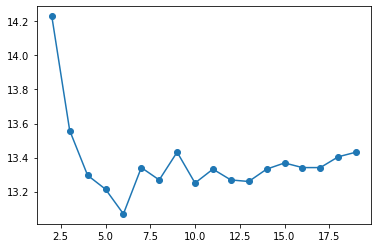

In [82]:
from sklearn import neighbors

errors = []
for k in range(2,20):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k,weights='distance', p=1)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,20), errors, 'o-')
plt.show()

In [83]:
bestk=np.argmin(errors)+2
print('k le plus performant:',bestk)
print("taux d'erreurs:" , np.min(errors))

k le plus performant: 6
taux d'erreurs: 13.06910937783421


In [84]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(n_neighbors=bestk,weights='distance', p=1)
knn.fit(xtrain, ytrain)

#données nutriscore inconnu
xnew=food_facts.loc[food_facts['nutrition_grade_fr']=='unknown',main_nutri_cols]

# On récupère les prédictions sur les données dont le nutriscore est inconnu
predicted = knn.predict(xnew)

In [85]:
#on remplace les valeurs inconnues par les prédictions
food_facts.loc[food_facts['nutrition_grade_fr']=='unknown','nutrition_grade_fr']=predicted

# Derniers retraitement et sauvegarde <a id="5"></a>

supprimons les dernières colonnes qui ne nous sont plus utiles pour notre analyse.

In [86]:
food_facts.drop(labels=['nutrition-score-fr_100g','main_category_fr'], axis=1, inplace=True)

In [87]:
food_facts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264344 entries, 0 to 264343
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         264344 non-null  object 
 1   url                          264344 non-null  object 
 2   product_name                 264344 non-null  object 
 3   brands                       264344 non-null  object 
 4   brands_tags                  264344 non-null  object 
 5   origins                      264344 non-null  object 
 6   origins_tags                 264344 non-null  object 
 7   countries_fr                 264344 non-null  object 
 8   ingredients_text             264344 non-null  object 
 9   allergens                    264344 non-null  object 
 10  traces_tags                  264344 non-null  object 
 11  traces_fr                    264344 non-null  object 
 12  additives_tags               264344 non-null  object 
 13 

In [88]:
food_facts.columns=food_facts.columns.str.replace('-','_')

In [89]:
food_facts.to_csv('Data/food_facts.csv', index=False)